In [68]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [69]:
#Step 2: READ DATA
df = pd.read_csv(r'D:\listings.csv')
df.isnull().sum()

id                                   0
name                                 2
host_id                              0
host_name                            0
neighbourhood_group                  0
neighbourhood                        0
latitude                             0
longitude                            0
room_type                            0
price                                0
minimum_nights                       0
number_of_reviews                    0
last_review                       2758
reviews_per_month                 2758
calculated_host_listings_count       0
availability_365                     0
dtype: int64

In [70]:
# set and cleaned the dates whereever there was null value
df['last_review'] = pd.to_datetime(df['last_review'], errors='coerce')
df_cleaned = df.dropna(subset=['last_review'])
df_cleaned.reset_index(drop=True, inplace=True)
df_cleaned.isnull().sum()

id                                0
name                              1
host_id                           0
host_name                         0
neighbourhood_group               0
neighbourhood                     0
latitude                          0
longitude                         0
room_type                         0
price                             0
minimum_nights                    0
number_of_reviews                 0
last_review                       0
reviews_per_month                 0
calculated_host_listings_count    0
availability_365                  0
dtype: int64

In [71]:
#1 name row is dropped
x= df_cleaned.dropna(subset=['name'])
x.isnull().sum()
x

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,49091,COZICOMFORT LONG TERM STAY ROOM 2,266763,Francesca,North Region,Woodlands,1.44255,103.79580,Private room,83,180,1,2013-10-21,0.01,2,365
1,50646,Pleasant Room along Bukit Timah,227796,Sujatha,Central Region,Bukit Timah,1.33235,103.78521,Private room,81,90,18,2014-12-26,0.28,1,365
2,56334,COZICOMFORT,266763,Francesca,North Region,Woodlands,1.44246,103.79667,Private room,69,6,20,2015-10-01,0.20,2,365
3,71609,Ensuite Room (Room 1 & 2) near EXPO,367042,Belinda,East Region,Tampines,1.34541,103.95712,Private room,206,1,14,2019-08-11,0.15,9,353
4,71896,B&B Room 1 near Airport & EXPO,367042,Belinda,East Region,Tampines,1.34567,103.95963,Private room,94,1,22,2019-07-28,0.22,9,355
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5144,37621650,Comfortable and spacious four-bedroom family s...,43591543,Donald,Central Region,Geylang,1.31410,103.90317,Entire home/apt,699,3,6,2019-08-23,6.00,15,189
5145,37690516,cozy Condominium in quite neighbourhoods,165475492,BOONChean,Central Region,Toa Payoh,1.34063,103.88219,Private room,60,1,1,2019-08-12,1.00,1,1
5146,37798739,near Clementi MRT female only,157856583,Elyssa,West Region,Clementi,1.30677,103.76224,Private room,56,1,1,2019-08-17,1.00,1,120
5147,37841266,Sunny Modern Condo in City Center walk to MRT,39207304,Sophie,Central Region,Rochor,1.30074,103.84742,Entire home/apt,237,7,1,2019-08-25,1.00,12,159


In [72]:
df_no_duplicates = x.drop_duplicates()

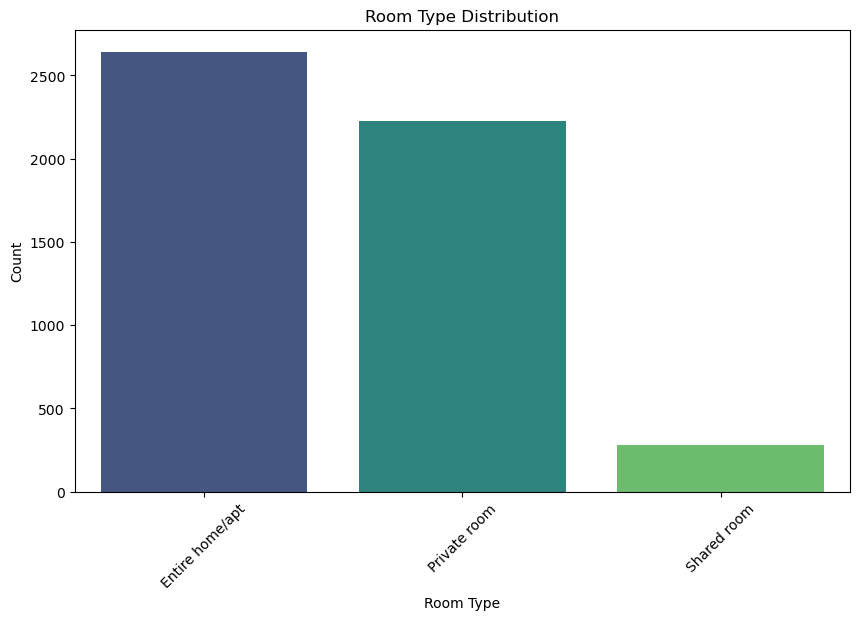

In [73]:
plt.figure(figsize=(10, 6))
sns.countplot(x='room_type',data=df_no_duplicates, order = df_no_duplicates['room_type'].value_counts().index, palette ='viridis')
plt.title('Room Type Distribution')
plt.xlabel('Room Type')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()


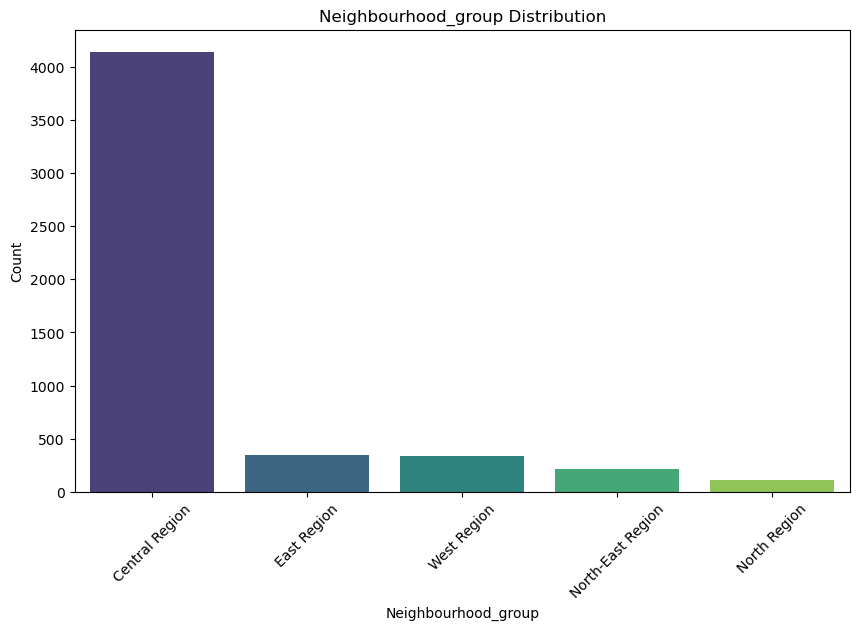

In [74]:
plt.figure(figsize=(10, 6))
sns.countplot(x='neighbourhood_group',data=df_no_duplicates, order = df_no_duplicates['neighbourhood_group'].value_counts().index, palette ='viridis')
plt.title('Neighbourhood_group Distribution')
plt.xlabel('Neighbourhood_group')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

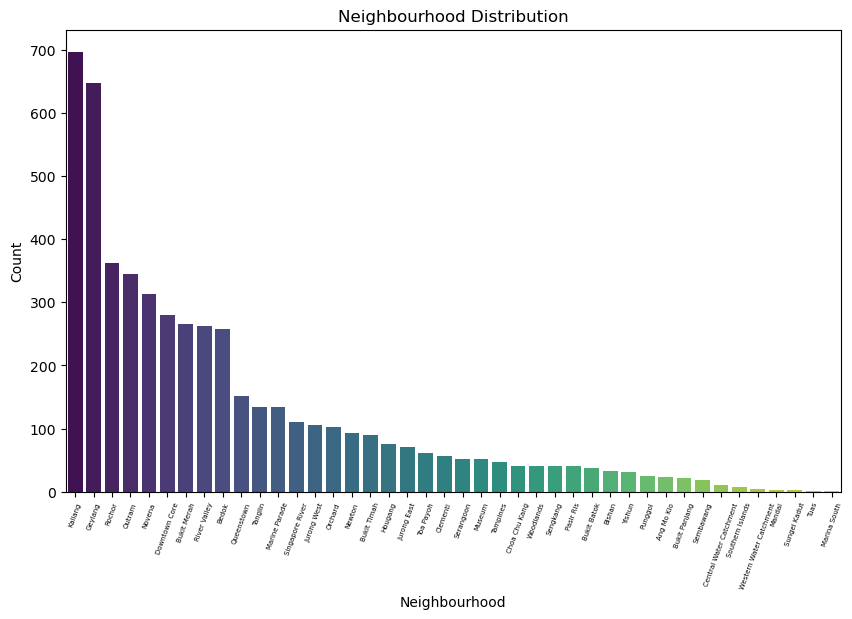

In [75]:
plt.figure(figsize=(10, 6))
sns.countplot(x='neighbourhood',data=df_no_duplicates, order = df_no_duplicates['neighbourhood'].value_counts().index, palette ='viridis')
plt.title('Neighbourhood Distribution')
plt.xlabel('Neighbourhood')
plt.ylabel('Count')
plt.xticks(rotation=70, size= 5)
plt.show()
#Step 3: Data Visualization (finished)

In [76]:
# Histogram of Numerical Columns

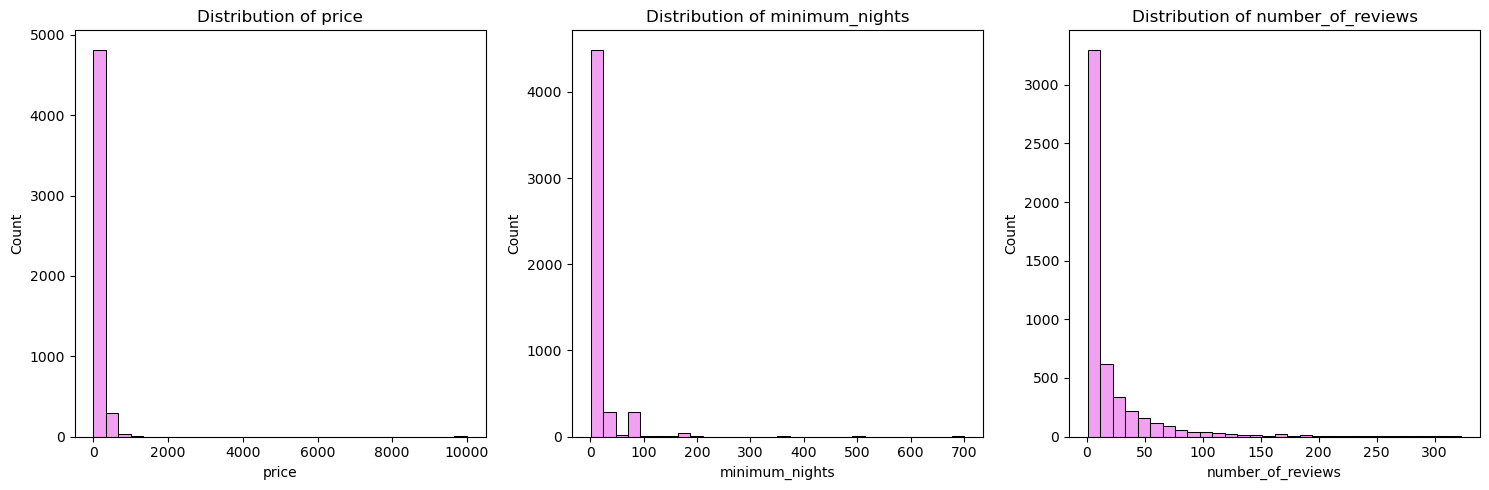

In [77]:

numeric_cols = ['price', 'minimum_nights', 'number_of_reviews']  # Replace with your numeric columns

plt.figure(figsize=(15, 5))

#it is not for i in numeric_cols because we also want the index for a laceholder and also the name of the column
# This helps you place each histogram in the correct subplot.
#You use i + 1 because plt.subplot() expects counting to start at 1, not 0.

for i, col in enumerate(numeric_cols):  
    plt.subplot(1, len(numeric_cols), i + 1)
    sns.histplot(data=df_no_duplicates, x=col, bins=30, color='violet')
    plt.title(f'Distribution of {col}')
    plt.xlabel(col)
    plt.ylabel('Count')

plt.tight_layout()
plt.show()

In [78]:
# HeatMap for numeric data Correlation

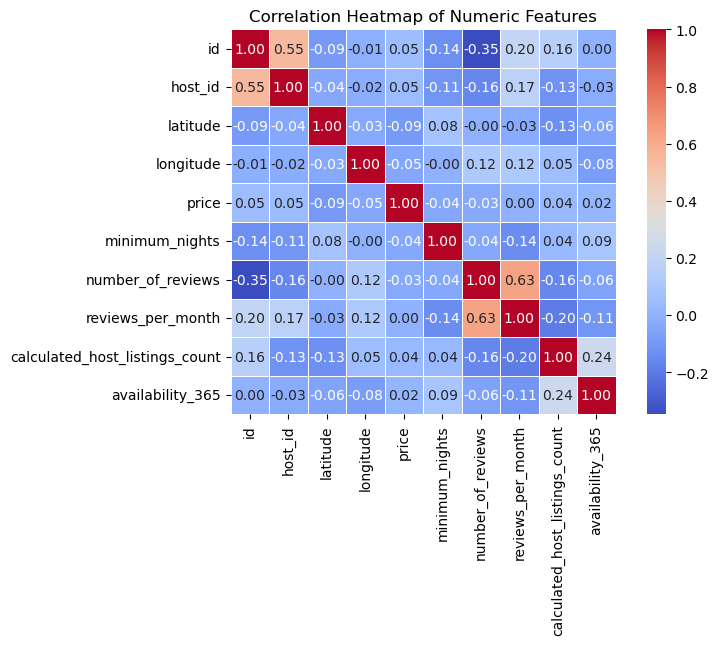

In [79]:
# Select only numeric columns
numeric_df = df_no_duplicates.select_dtypes(include=['float64', 'int64'])

# Compute the correlation matrix
corr_matrix = numeric_df.corr()

# Plot the heatmap
plt.figure(figsize=(8,5))
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap='coolwarm', square=True, linewidths=.5)
plt.title('Correlation Heatmap of Numeric Features')
plt.show()

# cmap='coolwarm': This sets the color map for the heatmap. 
# coolwarm gives a range of colors from blue (low correlation) to red (high correlation).
